<a href="https://colab.research.google.com/github/adelicia-js/gym-eda/blob/main/Gym_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis, Using Python

## Performed on a Gym Exercises Dataset 
(*Source: https://www.kaggle.com/datasets/niharika41298/gym-exercise-data*)

## Libraries Used: 
  1. Pandas 
  2. Numpy 
  3. MatPlotLib
  4. Seaborn
  5. MissingNo



---
## Importing Libraries

---

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

---
## Importing a Dataset

---

In [186]:
df = pd.read_csv('/content/megaGymDataset.csv')

---
## Viewing the Dataset

---


In [187]:
df.head()


,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN


In [188]:
df.columns


Index(['Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating', 'RatingDesc'],
      dtype='object')

In [189]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Columns: 9 entries, Unnamed: 0 to RatingDesc
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


---
###Observations:

1. The dataset consists of 9 columns, and entries ranging from 0 to 2917.

2. The columns in the dataset, before pre-processing are:

  `'Unnamed: 0', 'Title', 'Desc', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating', 'RatingDesc'`

3. The dataset consists of mostly non-numerical data, i.e., qualitative data. 
---



# **Performing Data Preprocessing**

---


## Detecting Missing Data

---

In [190]:
df.isnull().sum().sort_values(ascending = False)

RatingDesc    2056
Rating        1887
Desc          1550
Unnamed: 0       0
Title            0
Type             0
BodyPart         0
Equipment        0
Level            0
dtype: int64

---
##Exploratory Analysis and Visualization of Missing Values in Dataset

---

<Axes: >

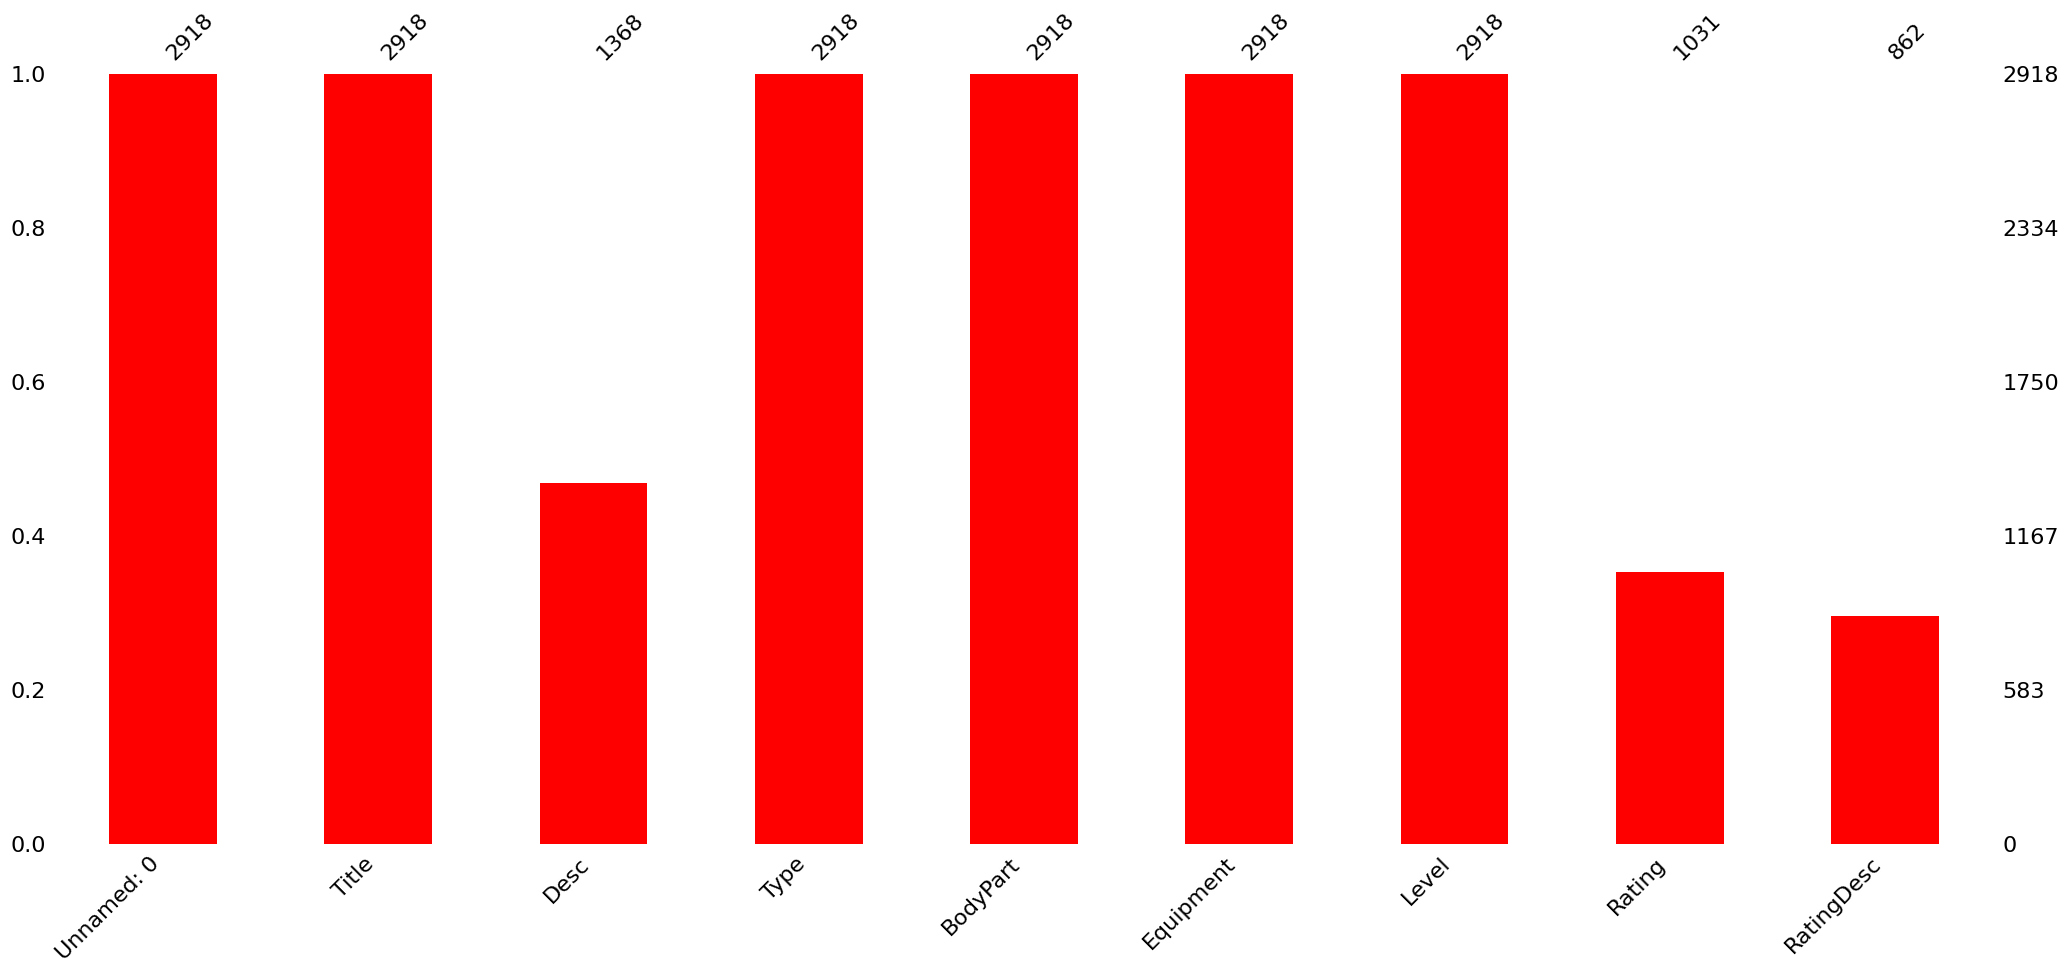

In [191]:
msno.bar(df, color='red')

---
The **Bar Chart** above displays the clear severity of missing values in the dataset, namely in the columns 'Desc', 'Rating' and 'RatingDesc'.

---

<Axes: >

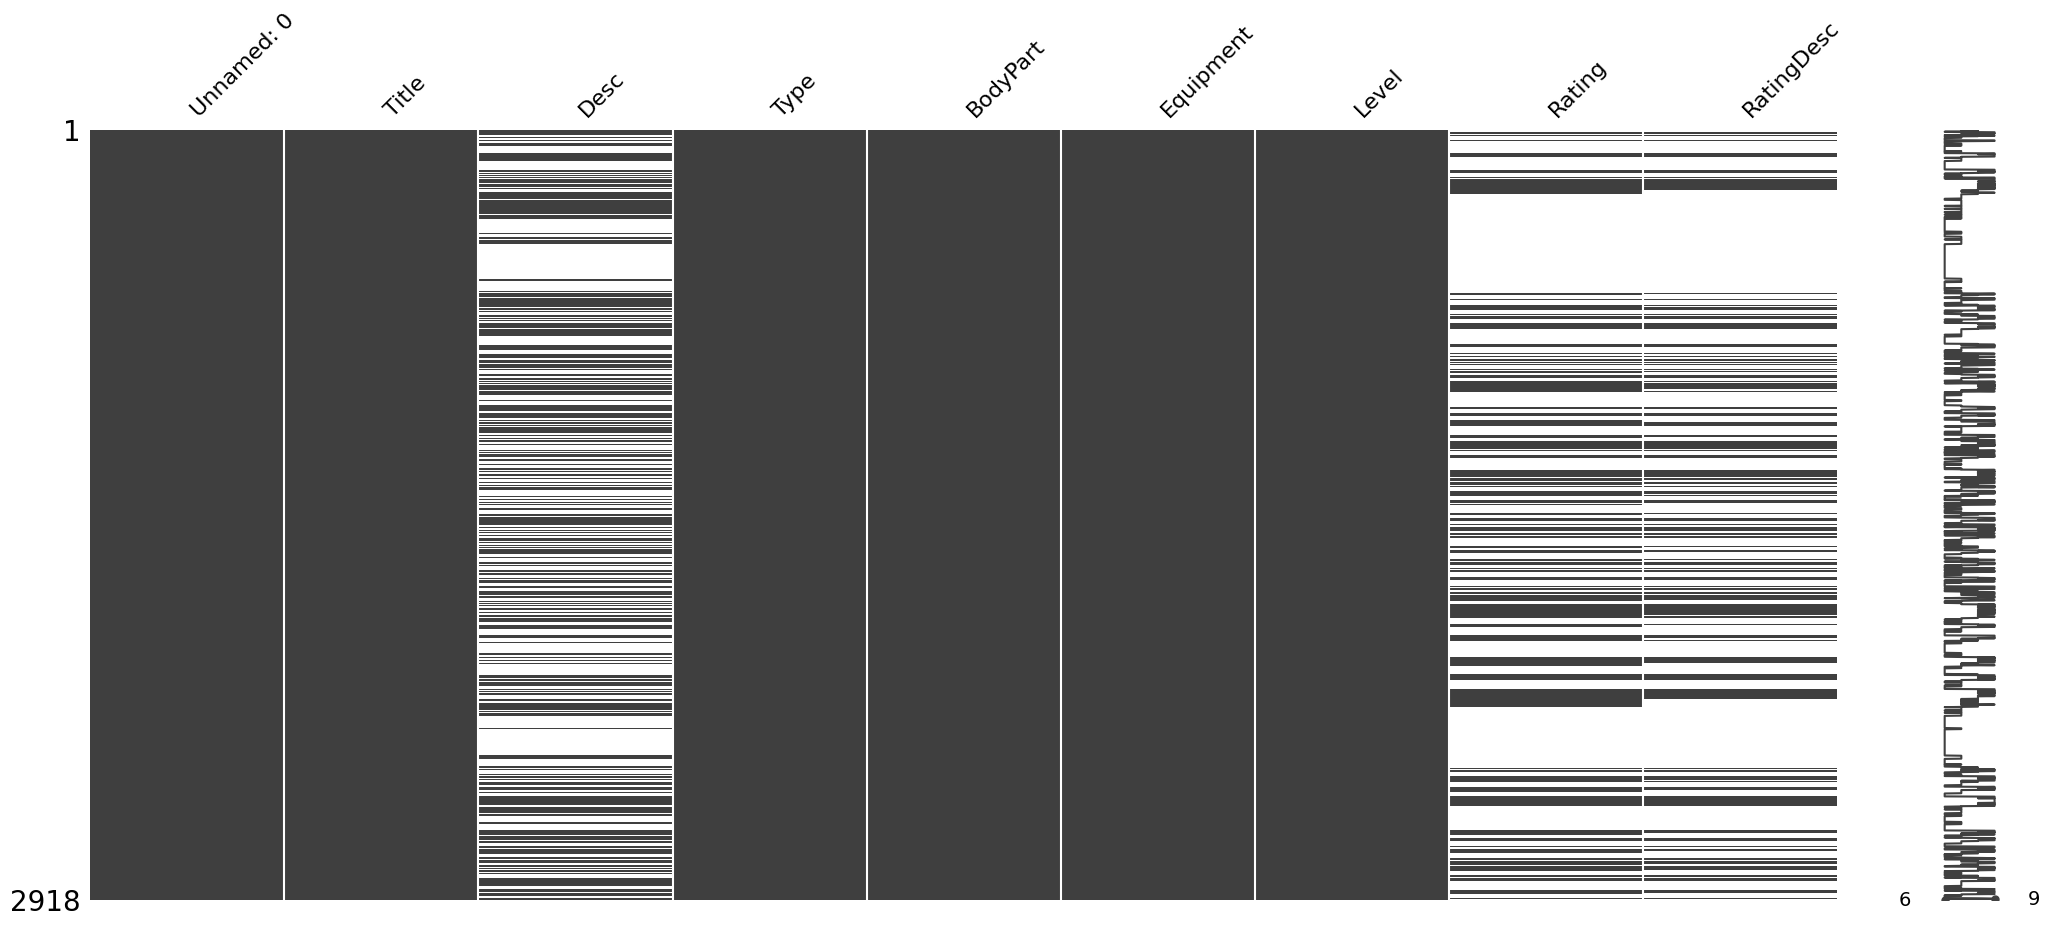

In [192]:
msno.matrix(df)

---
The **Matrix Plot** above locates missing values in the dataset, clearly in the columns Desc', 'Rating' and 'RatingDesc'.

---

<Axes: >

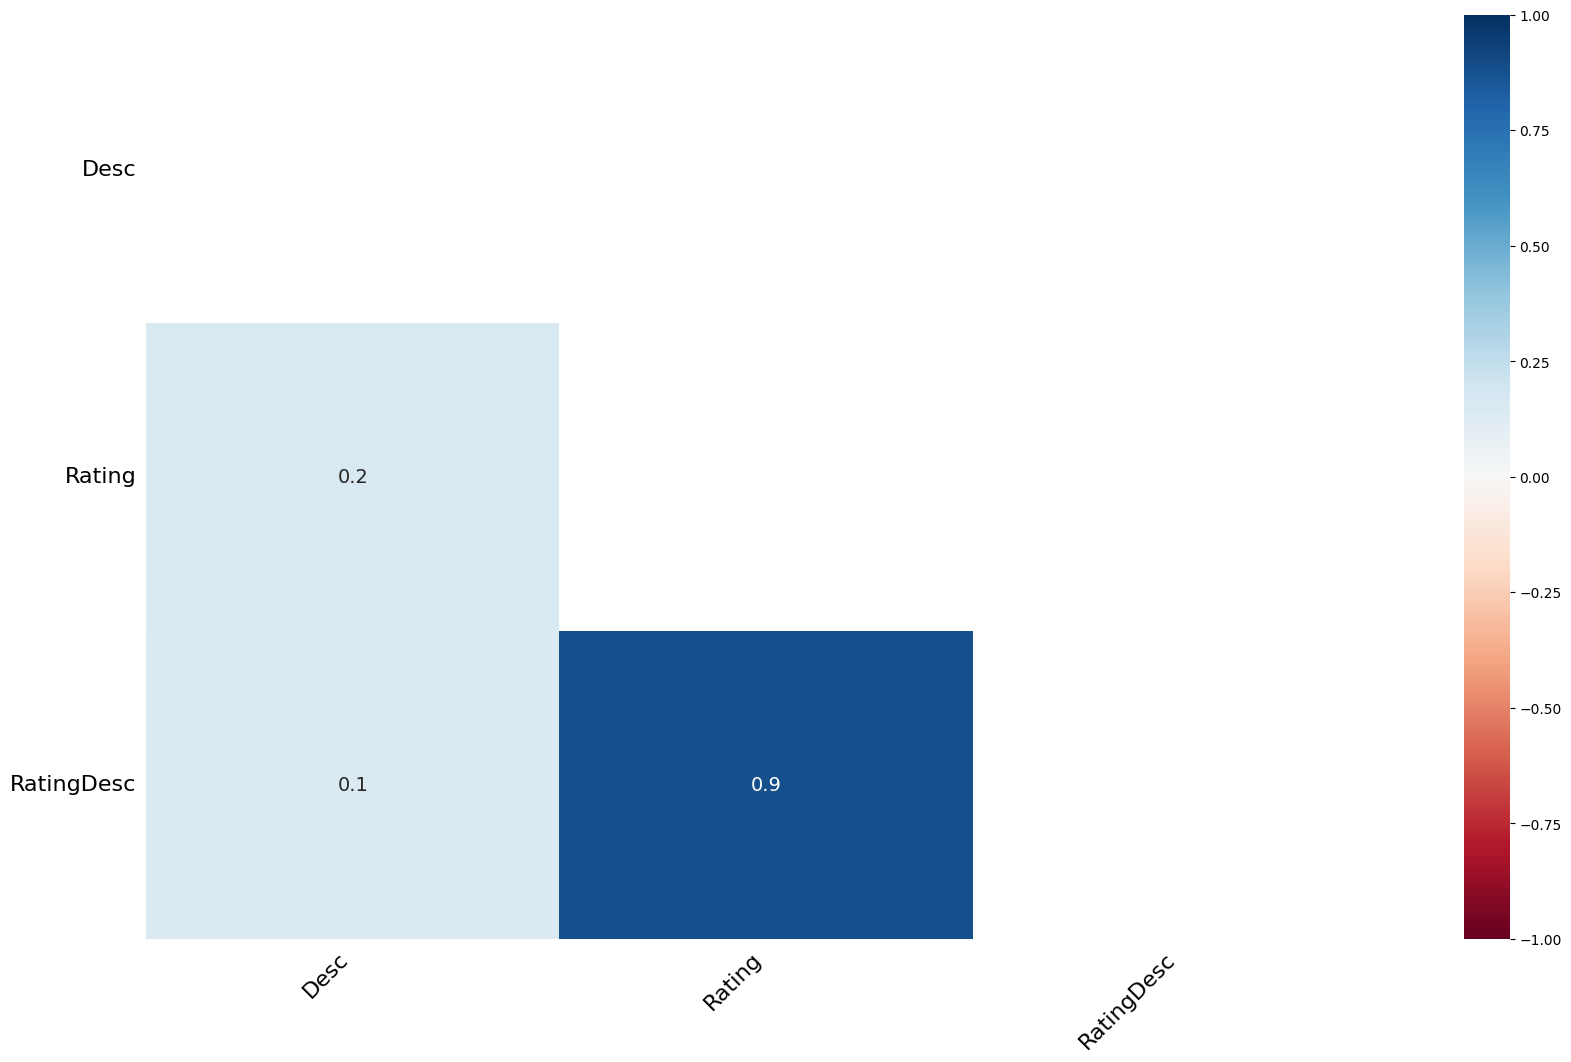

In [193]:
msno.heatmap(df)

---
The **Heatmap** above helps visualize the correspondence between missing values in the dataset. 

*'Rating' and 'RatingDesc' have a high correspondence*, while the columns 'Desc' & 'RatingDesc' and 'Desc' & 'Rating' do not have a very obvious correspondence.

---

### Observations:
- The columns that have a significantly high number of null values are:
  - 'Desc'
  - 'Rating'
  - 'RatingDesc'

- The columns 'Desc' & 'RatingDesc' will be dropped as they does not provide relevant information for EDA.

- The null values of 'Rating' will be dropped.

---

## Dropping Missing Data

---

In [194]:
df.drop(['Desc','RatingDesc'],axis=1,inplace=True)

In [195]:
df.columns

Index(['Unnamed: 0', 'Title', 'Type', 'BodyPart', 'Equipment', 'Level',
       'Rating'],
      dtype='object')

In [196]:
df.dropna(subset=['Rating'],inplace=True)

In [197]:
df.head()

,Unnamed: 0,Title,Type,BodyPart,Equipment,Level,Rating
0,0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
8,8,Barbell roll-out,Strength,Abdominals,Barbell,Intermediate,8.9
9,9,Barbell Ab Rollout - On Knees,Strength,Abdominals,Barbell,Intermediate,8.9
10,10,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5
11,11,Bench barbell roll-out,Strength,Abdominals,Barbell,Beginner,8.3


In [198]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 2914
Columns: 7 entries, Unnamed: 0 to Rating
dtypes: float64(1), int64(1), object(5)
memory usage: 64.4+ KB


---
### Observations:
1. The dataset now contains 7 rows and 1031 entries.

---

## Feature Exploration

---

Exploring each feature

---

In [199]:
df['Unnamed: 0'].nunique()

1031

In [200]:
df['Unnamed: 0'].unique()


array([   0,    8,    9, ..., 2912, 2913, 2914])

---
'Unnamed: 0' will be dropped due to it containing  irrelevant data for EDA.

---

In [201]:
df['Title'].nunique()

1025

In [202]:
df['Title'].unique()

array(['Partner plank band row', 'Barbell roll-out',
       'Barbell Ab Rollout - On Knees', ..., 'EZ-Bar Skullcrusher',
       'EZ-bar skullcrusher-',
       'Lying Close-Grip Barbell Triceps Press To Chin'], dtype=object)

In [203]:
df['Type'].nunique()

7

In [204]:
df['Type'].unique()

array(['Strength', 'Plyometrics', 'Stretching', 'Powerlifting',
       'Strongman', 'Olympic Weightlifting', 'Cardio'], dtype=object)

In [205]:
df['BodyPart'].nunique()

17

In [206]:
df['BodyPart'].unique()

array(['Abdominals', 'Adductors', 'Abductors', 'Biceps', 'Calves',
       'Chest', 'Forearms', 'Glutes', 'Hamstrings', 'Lats', 'Lower Back',
       'Middle Back', 'Traps', 'Neck', 'Quadriceps', 'Shoulders',
       'Triceps'], dtype=object)

In [207]:
df['Equipment'].nunique()

13

In [208]:
df['Equipment'].unique()

array(['Bands', 'Barbell', 'Kettlebells', 'Dumbbell', 'Other', 'Cable',
       'Machine', 'Body Only', 'Medicine Ball', 'None', 'Exercise Ball',
       'Foam Roll', 'E-Z Curl Bar'], dtype=object)

In [209]:
df['Level'].nunique()

3

In [210]:
df['Level'].unique()

array(['Intermediate', 'Beginner', 'Expert'], dtype=object)

In [211]:
df['Rating'].nunique()

72

In [212]:
df['Rating'].unique()

array([0. , 8.9, 8.5, 8.3, 7. , 4.7, 7.7, 7.3, 9.3, 8.6, 9.5, 9.2, 9. ,
       8.8, 8.4, 8. , 9.1, 8.2, 8.1, 7.9, 5. , 8.7, 7.8, 7.5, 7.4, 6.9,
       6.5, 3.9, 6.4, 4. , 2.8, 6.7, 3.8, 2.4, 1.6, 7.1, 3.6, 3.2, 5.8,
       7.6, 7.2, 4.8, 3.3, 1. , 6. , 5.3, 2.7, 6.3, 5.6, 4.1, 4.9, 4.2,
       5.5, 5.9, 3. , 9.4, 6.2, 9.6, 2.5, 5.2, 6.6, 3.5, 3.1, 4.4, 4.3,
       5.4, 4.5, 5.1, 5.7, 6.8, 3.4, 6.1])

In [213]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [214]:
df.head()

,Title,Type,BodyPart,Equipment,Level,Rating
0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
8,Barbell roll-out,Strength,Abdominals,Barbell,Intermediate,8.9
9,Barbell Ab Rollout - On Knees,Strength,Abdominals,Barbell,Intermediate,8.9
10,Decline bar press sit-up,Strength,Abdominals,Barbell,Intermediate,8.5
11,Bench barbell roll-out,Strength,Abdominals,Barbell,Beginner,8.3


In [215]:
df.columns

Index(['Title', 'Type', 'BodyPart', 'Equipment', 'Level', 'Rating'], dtype='object')

In [216]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 2914
Columns: 6 entries, Title to Rating
dtypes: float64(1), object(5)
memory usage: 56.4+ KB


---
### Observations:
1. The dataset now consists of 6 rows and 1031 entries.
2. The dataset can now be carefully analyzed, and various visualizations can be formed accordingly.

---